<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220513_ml_12_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B3%BC_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# GPU 정보 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3408208099490654484
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11413704904624172451
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [1]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install mglearn

### 코렙에서 한글 사용

In [3]:
!sudo apt-get -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()

In [5]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

### 구글드라이브 연동

In [6]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt			       'sample (1).xlsx'
'2. 영화평점, 날짜별 영화평점 시각화'   sample2.pdf
 매수종목2.txt			        sample.docx
 atlas-higgs-challenge-2014-v2.csv.gz   sample_merge.pdf
 auto-mpg.csv			        sample.xlsx
 bmi_500.csv			        score.csv
 매수종목.csv			        seoul.html
 data_studentlist_en.csv	       'stock price (1).xlsx'
'demo (1).docx'			       'stock price.xlsx'
 demo.docx			        stock_px.csv
 example.docx			       'stock valuation.xlsx'
 heart_disease.csv		        test.db.db
 height_weight.txt		        test.txt
 hello_world.xlsx		        Titanic배포용
 HelloWorld.xlsx		        titanic_test.csv
'house_price (1).csv'		        titanic_train.csv
 house_price.csv		        titanic.xls
 lenna.png			        titanic.xlsx
'little-char (1).png'		        Traffic_Accident_2017.csv
 little-char.png		        train.csv
 population_number.csv		        user_id_mean.csv
 ram_price.csv			        wine.csv
 ratings_small.txt		        주가데이ᄐ

# 신경망

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

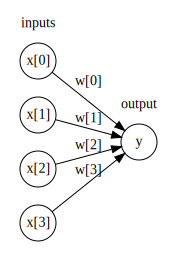

In [8]:
# 입력 특성과 예측 결과는 노드로, 가중치는 연결선으로 표현
mglearn.plots.plot_logistic_regression_graph()

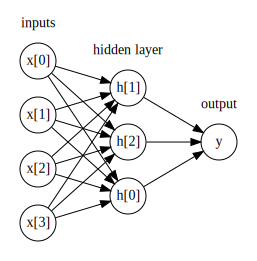

In [9]:
# 하나의 은닉층을 갖는 다층 퍼셉트론(신경망)
# 은닉층의 노드(유닛)들이 모두 연결되어 있는 완전 연결 신경망
mglearn.plots.plot_single_hidden_layer_graph()

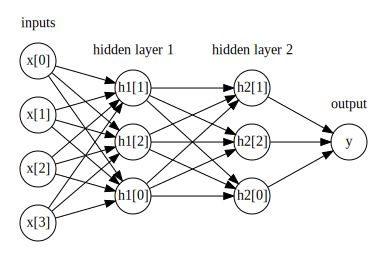

In [10]:
# 두 개의 은닉층을 갖는 다층 퍼셉트론(신경망)
mglearn.plots.plot_two_hidden_layer_graph()

딥러닝

- 많은 은닉층으로 구성된 대규모의 신경망 학습

활성화 함수

- 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수를 적용
- 선형 모델보다 훨씬 더 복잡한 함수를 학습이 가능
- 렐루(ReLU), 하이퍼볼릭 탄젠트(tanh)

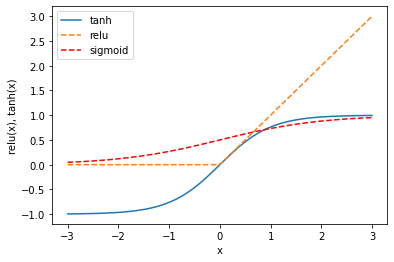

In [ ]:
def logreg(z):
  return 1 / (1 + np.exp(-z))

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.plot(line, logreg(line), 'r--', label="sigmoid")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show()

사이킷런에서의 신경망

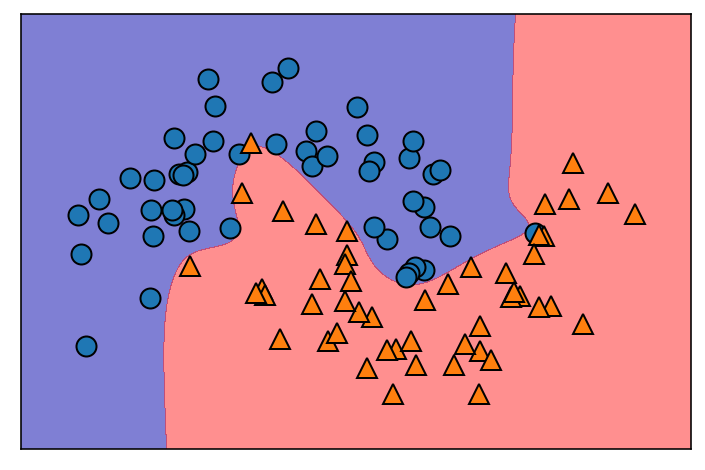

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# 옵티마이저(solver) lbfgs, sgd, adam
# 활성화 함수(activation) tanh, logistic, relu, identity
# 은닉층 노드(유닛) 개수
model = MLPClassifier(solver = 'lbfgs',
                      activation='tanh',
                      hidden_layer_sizes=[10, 10],
                      alpha = 0.1,
                      random_state=0, max_iter=1000)
model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill = True, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show()

유방암 데이터셋 적용

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

model = MLPClassifier(random_state=0, max_iter=1000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9248826291079812, 0.9300699300699301)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPClassifier(random_state=0, 
                      alpha =1,
                      max_iter=1000
                      ).fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(0.9882629107981221, 0.986013986013986)

In [32]:
np.array(model.coefs_).shape

(2,)

In [34]:
# 표준편차, 분산
model.coefs_[0].std(axis=1), model.coefs_[0].var(axis=1) 

(array([0.02853051, 0.04494939, 0.03594859, 0.03365879, 0.02143914,
        0.02334264, 0.03279875, 0.03736919, 0.01976834, 0.01727001,
        0.04655445, 0.02245624, 0.03102266, 0.03664325, 0.01848846,
        0.03113842, 0.01206431, 0.01770559, 0.02110327, 0.0231428 ,
        0.04924508, 0.06193648, 0.04073413, 0.04526902, 0.04273502,
        0.01443308, 0.03692801, 0.0491466 , 0.04272862, 0.0159352 ]),
 array([0.00081399, 0.00202045, 0.0012923 , 0.00113291, 0.00045964,
        0.00054488, 0.00107576, 0.00139646, 0.00039079, 0.00029825,
        0.00216732, 0.00050428, 0.00096241, 0.00134273, 0.00034182,
        0.0009696 , 0.00014555, 0.00031349, 0.00044535, 0.00053559,
        0.00242508, 0.00383613, 0.00165927, 0.00204928, 0.00182628,
        0.00020831, 0.00136368, 0.00241539, 0.00182574, 0.00025393]))

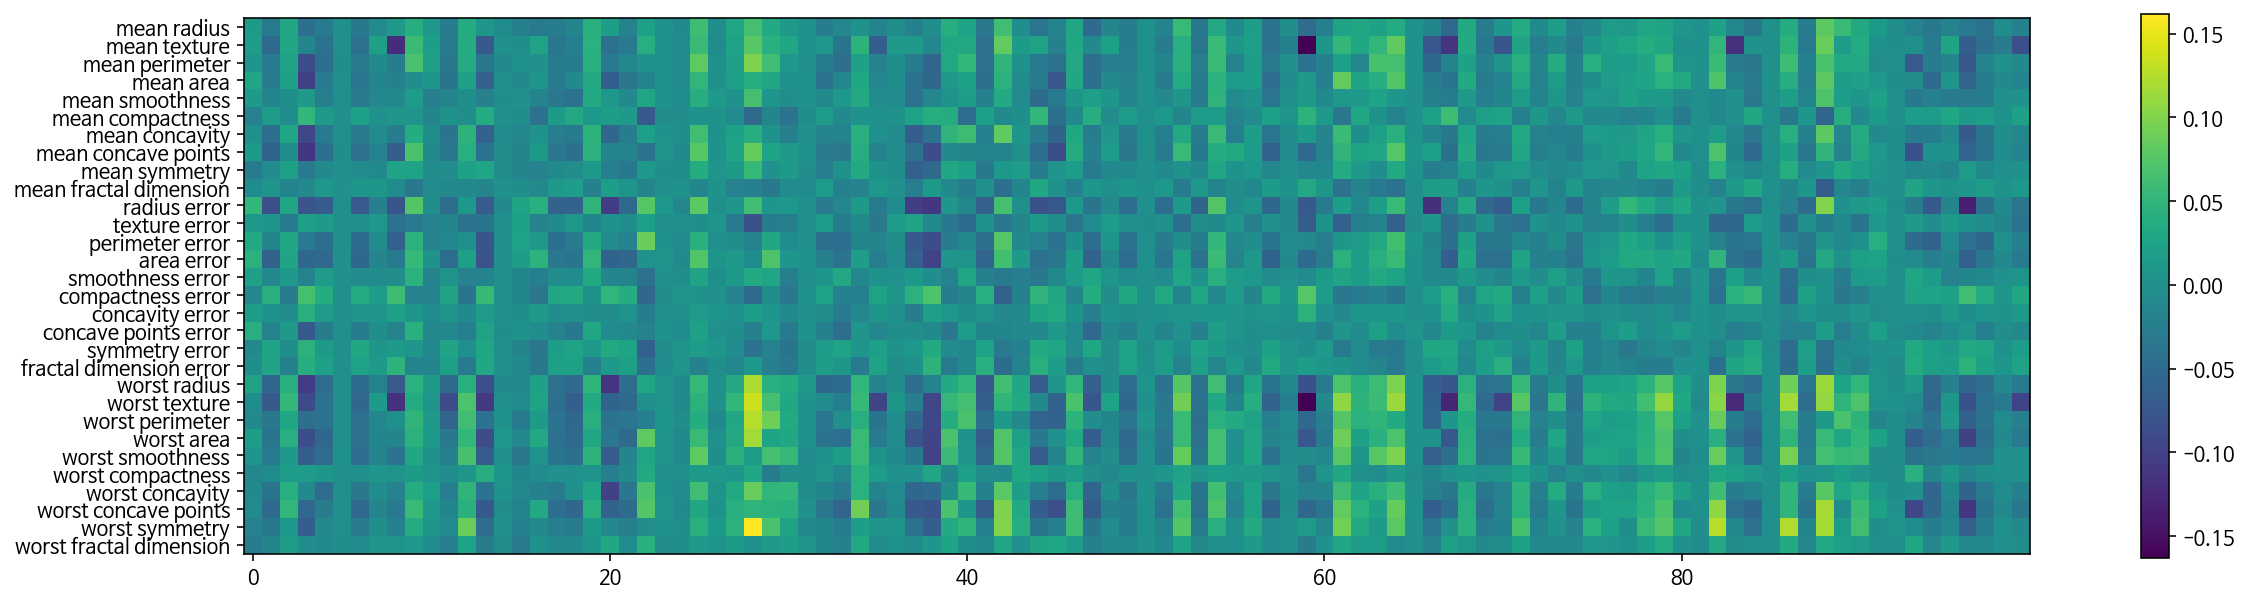

In [36]:
plt.figure( figsize = (20, 5))
plt.imshow(model.coefs_[0], interpolation='none')
plt.colorbar()

plt.yticks(range(30), cancer.feature_names)
plt.show()

- 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하거나 신경망에게 적절하게 입력되지 않았을 수 있음

# 모델 설계

tensorflow keras를 활용

In [38]:
import tensorflow as tf
tf.keras.__version__, tf.__version__

('2.8.0', '2.8.0')

### [텐서플로우(TensorFlow)](https://www.tensorflow.org/?hl=ko)

* 강력한 수치 계산용 라이브러리
* 텐서플로우 API는 텐서를 순환, 한 연산에서 다른 연산으로 흐름

* 핵심 구조는 넘파이와 비슷하지만 GPU를 지원
* 분산 컴퓨팅을 지원
* 자동 미분 기능과 RMSProp, Nadam 같은 고성능 옵티마이저를 제공하므로 손실 함수를 쉽게 최소화 가능

* [공식튜토리얼 가이드](https://github.com/tensorflow/docs-l10n)

* [텐서플로우 문서 한글 번역](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/api_docs/)

In [39]:
import tensorflow as tf

x = np.array([[1,2],[3,4],[5,6]])
t = tf.constant(x)
# t = tf.constant([[1,2],[3,4],[5,6]])
print(t)
print(t.shape)

# 인덱스 참조
print(t[:, 1:])
print(t[..., 1, tf.newaxis])

# 텐서 연산
print(t + 10)
print(tf.square(t))
print( t @ tf.transpose(t) )  # @연산은 행렬 곱셈을 위해 파이썬 3.5에 추가
print( tf.matmul(t, tf.transpose(t)) )

# 텐서와 넘파이
x = np.array([2,4,6])
t = tf.constant(x)
print(t.numpy())
print( tf.square(x), np.square(t))

# 타입 변환
t = tf.constant(40., dtype=tf.float64)
z = tf.constant(2.0) + tf.cast(t, tf.float32)
print(z)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int64)
(3, 2)
tf.Tensor(
[[2]
 [4]
 [6]], shape=(3, 1), dtype=int64)
tf.Tensor(
[[2]
 [4]
 [6]], shape=(3, 1), dtype=int64)
tf.Tensor(
[[11 12]
 [13 14]
 [15 16]], shape=(3, 2), dtype=int64)
tf.Tensor(
[[ 1  4]
 [ 9 16]
 [25 36]], shape=(3, 2), dtype=int64)
tf.Tensor(
[[ 5 11 17]
 [11 25 39]
 [17 39 61]], shape=(3, 3), dtype=int64)
tf.Tensor(
[[ 5 11 17]
 [11 25 39]
 [17 39 61]], shape=(3, 3), dtype=int64)
[2 4 6]
tf.Tensor([ 4 16 36], shape=(3,), dtype=int64) [ 4 16 36]
tf.Tensor(42.0, shape=(), dtype=float32)


In [40]:
# tf.Tensor는 변경이 불가능한 객체
# tf.Variable를 변수로 사용
v = tf.Variable([[1., 2., 3.],[4.,5.,6.]])
print(v)

# 값 변경
print( v.assign(2 * v) )
print( v[0,1].assign(42) )
print( v[:,2].assign([0., 1.]) )
print( v.scatter_nd_update(indices=[[0,0],[1,2]], updates=[100., 200.]) )

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>
<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

### 딥러닝 연습 01 - 분류

* 폐암 수술환자의 생존율 예측

Data set의 형태 (ThoraricSurgery.csv)
* 폴란드 브로츠와프 의과대학에서 2013년 공개한 폐암 수술 환자의 수술 전 데이터와 수술 후 생존 결과를 기록한 의료 기록 데이터
* 18개 항목으로 구성된 470개의 데이터로 구성되고 각 항목은 ,로 구분
* 종양 유형, 폐활량, 호흡곤란여부, 고통 정도, 기침, 흡연, 천식여부 등 17가지 환자 상태
* 18번째 항목은 수술 후 생존 결과 (1 : 생존, 0 : 사망)


* https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data


In [49]:
# 딥러닝에 필요한 케라스 함수
from keras import Sequential # 한방향
from keras.layers import Dense # 밀집 신경망

# 추가 라이브러리
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# 실행할 때마다 같은 결과를 출력하기 위해 설정
seed = 3
np.random.seed( seed )
tf.random.set_seed( seed )

# 수술 환자 데이터 로드
data = np.loadtxt(drive_path + 'ThoraricSurgery.csv', delimiter=',') # delimiter 데이터 구분자
data

# 환자의 기록과 수술 결과를 X와 y로 구분하여 저장
# 신경망에 학습시킬 때 사용하는 특성은 총 몇개일까? 모양
X = data[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 딥러닝 구조를 결정 (모델을 설정하고 실행하는 부분)
model = Sequential()
model.add( Dense(30, input_dim = 17, activation= 'relu', name = 'Hidden_1') )
model.add( Dense(1, activation= 'sigmoid', name = 'Output') )

# 딥러닝을 실행
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'] )
model.fit(X_train, y_train, epochs =100, batch_size=10, verbose=0) # verbose: 과정 출력

# 정확도
print(f"정확도 : {model.evaluate(X_test, y_test)[1]:.4}")
model.evaluate(X_test, y_test)


4/4 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8644
정확도 : 0.8644
4/4 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8644


[0.39083048701286316, 0.8644067645072937]

딥러닝 구조를 결정 (모델을 설정하고 실행하는 부분)

- 층(Layer) : 핵심 구성요소로 일종의 데이터 처리 필터 (어떤 데이터가 들어가면 더 유용한 형태로 출력될까)
-  주어진 문제에 더 의미 있는 표현을 입력된 데이터로부터 추출

딥러닝을 실행

> compile() : 학습 프로세스를 설정하는 기능
 
> fit() : 학습 데이터로 학습하는 기능
 
complie(손실함수 종류, 최적화(오차감소) 방법, 평가 방법)
 
* fit(입력 데이터, 입력 라벨, 학습 반복 횟수(30개 층에 대해 한번씩 계산), 한번에 처리할 데이 터 수)

* 손실함수(loss function) : 오차 계산 방법 (MSE (평균제곱오차), CEE (교차 엔트로피 오차) 등)

* 최적화 방법(Optimizer) : 정답을 찾아가는 방법 (SGD (확률적 경사하강법), 모멘텀, AdaGrad, Adam 등)

* 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도만 고려

---
#### 모델 저장과 재사용

In [50]:
# Survival rate of lung cancer surgery patients Model
model.save(drive_path + 'Survival_rate_cancer_model.h5')

In [51]:
# 테스트를 위해 메모리 내의 모델을 삭제
del model

In [52]:
# load_model
from keras.models import load_model
model = load_model(drive_path + 'Survival_rate_cancer_model.h5')
model.evaluate(X, y)[1]

15/15 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8532


0.8531914949417114

---
#### 모델 설명과 정리

코드 구성

1. 데이터 분석과 입력 : 데이터를 불러와서 사용할 수 있게 만들어 주는 부분 <br>(라이브러리 로드, 데이터 셋 로드, 데이터 셋을 변수에 저장)

2. 딥러닝 실행(학습) : 실제 딥러닝을 실행하는 부분 <br> Squential(), Dense(), compile(), fit()

3. 결과 출력(예측) : 예측 결과를 출력하는 부분 <br>evaluate(), predict()

 실행 순서

1. 컴파일 : compile()
2. 훈련(학습) : fit()
3. 평가 : evaluate()
4. 예측 : predict()


모델 기본 구조

1. 입력층
2. 은닉층
3. 출력층

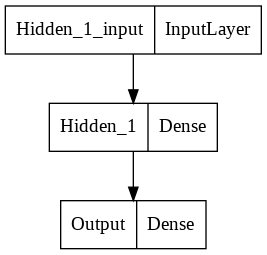

In [53]:
keras.utils.plot_model(model)

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 30)                540       
                                                                 
 Output (Dense)              (None, 1)                 31        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


* 모델 코드

 ```
# 딥러닝 구조를 결정 (모델을 설정하고 실행하는 부분)
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu', name='Hidden-1'))
model.add(Dense(1, activation='sigmoid', name='Ourput'))
```

 - Sequential() : 신경망을 한층 한층 쌓는 기능 (add() 함수 사용)
 - Dense() : 신경망 각층의 특성을 설정하는 기능
 - Dense(출력 뉴런 수, 입력뉴런 수, 활성화 함수 종류)
 - Dense(출력 뉴런 수, 활성화 함수 종류)
 - 활성화 함수 : 출력으로 나오게 하는 기준값 <br>
(sigmoid, tanh, relu, softmax 등)


 * 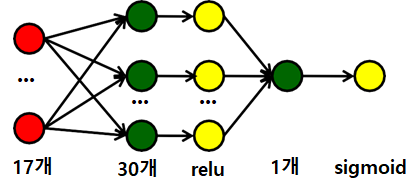

compile()  메소드의 주요 파라미터

|compile()|손실함수 | 최적화 도구 |평가도구|
|-|-|-|-|
|| (loss) |(optimizer)| (metrics)|

 * 손실함수의 종류

|용도|손실함수|
|---|---|
|회귀|mean_square_error 또는 mse|
|이진 분류|binary_crossentropy |
|다중 분류|categorical_crossentrop|

* 최적화 도구의 종류

 - rmsprop
 - adam

* 평가도구

 - 오차율 : ['loss']
 - 정확도 : ['accuracy']


fit() 메소드의 주요 파라미터

|훈련용 특징데이터|훈련용 라벨데이터| epochs| batch_size|
|---|---|---|---|

* epochs : 학습 반복 회수 (문제를 몇 번 풀어 볼 것인지 의미)

* batch_size : 한 번 반복할 때 사용할 데이터의 수 (몇 문제를 풀고 해답을 확인하는 지를 의미)

* 배치사이즈가 10이면 열 문제씩 풀어보고 해답 맞춰보는 것
* 100문항을 10문제씩 나누어서 10번 해답을 맞추므로 가중치 갱신은 10번 일어남

* 반복 회수 (epoch) 마다 100문제씩 (batch) 푼 경우 틀린 문제의 수


 * 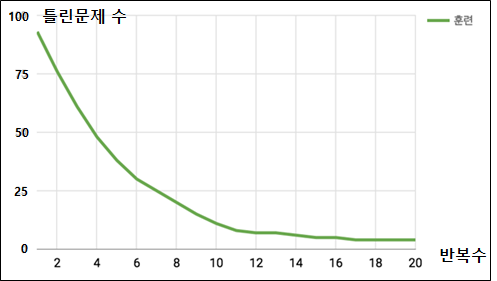

* 모델 실행 코드

 ```
# 딥러닝을 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
```

 - compile() : 학습 프로세스를 설정하는 기능
 - fit() : 학습 데이터로 학습하는 기능
 - complie(손실함수 종류, 최적화(오차감소) 방법, 평가 방법) 
 - fit(입력 데이터, 입력 라벨, 학습 반복 횟수(30개 층에 대해 한번씩 계산), 한번에 처리할 데이터 수)
<br><br>
 - 손실함수 : 오차 계산 방법 (MSE (최소자승오차), CEE (교차 엔트로피 오차) 등)
 - 최적화 방법 : 정답을 찾아가는 방법 (SGD (확률적 경사하강법), 모멘텀, AdaGrad, Adam 등)



 * 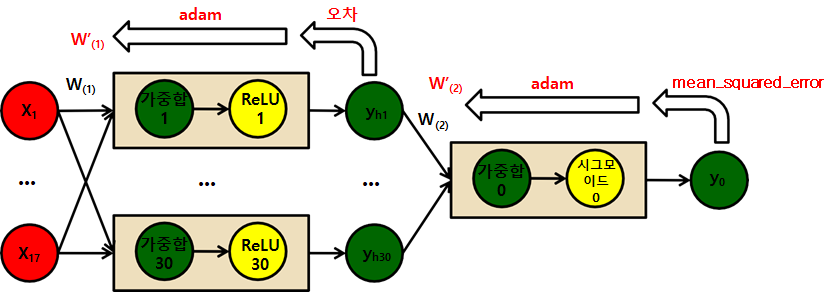

evlauate( 테스트용 특징데이터, 테스트용 라벨데이터 )

predict( 예측할 특징데이터 )

* 모델 평가 코드
```
print("Accuracy: %.4f" % model.evaluate(X_test, y_test)[1])
```

 - evaluate() : 출력값과 metrics로 설정한 결과값을 반환
 - metrics로 설정한 결과 값을 반환


신경망 층 예시
```
Conv1D() Conv2D()
MaxPool2D() MaxPool1D()
GlobalMaxPooling1D() Flatten()
Dropout() Embedding()
SimpleRNN() LSTM()
GRU()
```

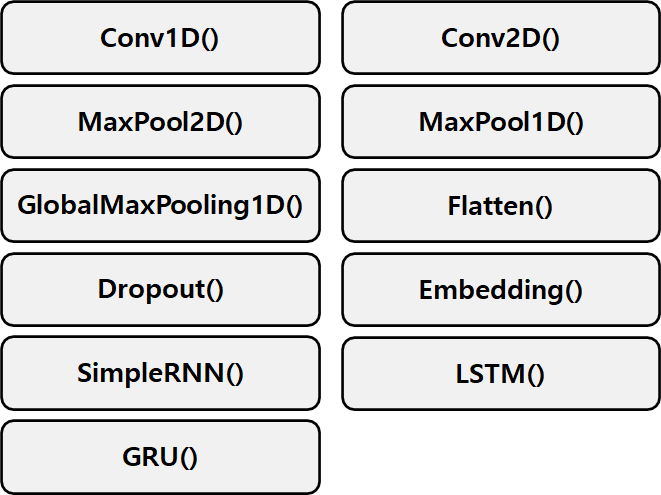

---

### 텐서(tensor)

* 신경망을 위한 데이터 표현

* 텐서(tensor)를 기본 구조로 사용

* 텐서(tensor) : 데이터를 위한 컨테이너 (숫자를 위한 컨테이너)
 - 임의의 차원 개수를 가지는 행렬의 일반화된 모습 (다차원 배열)
 - 차원(dimension)을 축(axis)이라고 부름


텐서의 실제 사례
* (samples, features) : 벡터 배열 데이터
* (samples, timesteps, features) : 시계열 데이터 또는 시퀀스 데이터
* (samples, height, width, channels) : 이미지 데이터
* (samples, frames, height, width, channels) : 동영상 데이터


핵심 속성 3가지
* 축의 개수(rank)
* 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내는 파이썬의 튜플
* 데이터 타입

#### 0D 텐서(0차원 텐서, 스칼라 텐서)

* 0개의 축
* 하나의 숫자 값
* 넘파이의 float32, float64 타입의 숫자 배열
* 랭크(rank) : 텐서의 축 개수

In [55]:
import numpy as np
x = np.array(12)
x, x.ndim, x.shape, x.dtype

(array(12), 0, (), dtype('int64'))

#### 1D 텐서(벡터)

* 1개의 축
* 숫자의 배열
* 벡터의 차원과 텐서의 축 구분을 주의

In [56]:
x = np.array([1,2,3,4,5])
x, x.ndim, x.shape

(array([1, 2, 3, 4, 5]), 1, (5,))

* 5개의 원소를 가지므로 5차원 벡터라고 부름
* 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것
* 5D 텐서는 5개의 축을 가진 것 (각 축을 따라 여러 개의 차원을 가진 벡터가 놓일 수 있음)
* 차원수(dimensionality)는 특정 축을 따라 놓인 원소의 개수이거나 텐서의 축 개수를 의미하므로 혼동하기 쉬움
* 축의 경우 랭크 5인 텐서라고 말하는 것이 정확

#### 2D 텐서(행렬)

* 2개의 축
* 벡터의 배열
* 보통 행(row)과 열(column)으로 지칭 <br>
  또는 행(sample) 열(features)
* 행: 첫 번째 축에 놓여 있는 원소, 샘플 축
* 열: 두 번째 축에 놓여 있는 원소, 특성 축

* 예)
 > 사람의 나이, 우편번호, 소득으로 구성된 10만명의 인구 통계 데이터 (100000, 3)

 > 공통 단어 2만 개로 만든 사전에서 각 단어가 등장한 횟수로 표현된 텍스트 500개의 문서 데이터셋 (500, 20000) 

In [57]:
x = np.array([[1,2,3,4,5],
              [6,7,8,9,10],
              [11,12,13,14,15]])
x, x.ndim, x.shape

(array([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15]]), 2, (3, 5))

#### 3D 텐서(직육면체, 시계열 또는 시퀀스 데이터)

* 3개의 축
* 데이터에 시간(또는 연속된 순서)이 중요할 때는 시간 축을 포함하여 3D 텐서로 저장
* 각 샘플은 벡터 배열(2D 텐서)의 시퀀스로 배치
* 관례 적으로 시간 축은 항상 두 번째 축(인덱스가 1인 축)

* 예)
 > 주식 가격 데이터셋 : 1분마다 현재 주식 가격, 지난 1분 동안 최고 가격, 최소 가격을 하루 거래 시간 390분으로 저장된 250일치의 데이터 (250, 390, 3)

 > 트윗 데이터셋 : 각 트윗은 128개의 알파벳으로 구성된 280개 문자 시퀀스를 100만개 트윗한 데이터 (1000000, 280, 128)

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
digit = X_train[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# 28 x 28 크기의 8비트 정수 행렬 6만 개가 있는 3D 텐서
digit.ndim, X_train.ndim, X_train.shape, X_train.dtype

In [ ]:
X_train[10:100].shape
X_train[10:100, :, :].shape
X_train[10:100, :28, :28].shape

In [ ]:
# 이미지의 오른쪽 아래 14 x 14픽셀을 선택
X_train[:, :14, :14].shape

# 정중앙에 위치한 14 x 14픽셀을 이미지에서 잘라냄
X_train[:, :-7, :-7].shape

#### 4D 텐서(이미지 데이터)

* 4개의 축
* 높이, 너비, 컬러 채널의 3차원으로 이루어진 이미지에 대한 샘플 데이터셋

* 예)
 > 256 x 256 크기의 흑백 이미지에 대한 128개의 데이터셋 (128, 256, 256, 1)

 * 텐서플로우는 채널 마지막 방식을 사용 (samples, height, width, color_depth)
 * 시아노는 채널 우선 방식을 사용 (samples, color_depth, height, width)
 * 케라스는 모두 지원 (케라스 설정 파일 keras.json의 image_data_format 옵션을 수정 channels_last or channels_first)

#### 5D 텐서(비디오 데이터)

* 5개의 축
* 하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지 (samples, frames, height, width, color_depth)

* 예)
 > 60초짜리 144 x 256 유튜브 비디오 클립을 초당 4프레임으로 샘플링한 240 프레임의 비디오 클립 4개 (4, 240, 144, 256, 3)

  * 총 106,168,320개의 값
  * float32의 경우 각 값이 32비트로 저장되므로 텐서 크기는 405MB

### 딥러닝 연습 02 - 과적합 피하기

* 음파탐지기로 광석과 일반 돌을 측정한 데이터
sonar 데이터셋 구성
 - 208개의 데이터
 - 60개의 정보 (컬럼 수)와 1개의 클래스로 구성


In [ ]:
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 로드


In [ ]:
# 전처리


In [ ]:
# 모델 생성


# 모델 컴파일


# 모델 실행


In [ ]:
# 결과 출력


* 과적합은 층이 너무 많거나 변수가 복잡해서 발생하기도 하고
* 테스트셋과 훈련셋이 중복될 때 생기기도 함

#### 훈련셋과 평가셋 구분

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# 모델 생성


# 모델 컴파일


# 모델 실행


In [ ]:
# 결과 출력


#### K겹 교차 검증

In [ ]:
# 10개의 파일로 쪼갬
# StratifiedKFold


In [ ]:
# 빈 정확도 배열 준비


In [ ]:
# X, y

In [ ]:
# 모델 반복 실행
#   모델 생성
#   모델 컴파일
#   모델 실행


In [ ]:
# 결과 출력


### 딥러닝 연습 03 - 베스트 모델 만들기

* 포트투칼의 비뉴 베르드 지방에서 만들어진 와인을 측정한 데이터
* 데이터셋 구성
 - 1,599개의 레드와인 데이터, 4,898개의 화이트와인 데이터 (총 6,497개 데이터)
 - 12개의 정보와 1개의 클래스로 구성



In [ ]:
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 로드


In [ ]:
# 원본 데이터의 50%만 사용


In [ ]:
# X, y

In [ ]:
# 이항 분류 문제 binary_crossentropy, adam

# 모델 생성


# 모델 컴파일


# 모델 실행


In [ ]:
# 결과 출력


#### 모델 업데이트 저장

* Keras 콜백 함수 ModelCheckpoint() 이용

In [ ]:
from keras.callbacks import ModelCheckpoint
import os

# 모델 생성


# 모델 컴파일


# 모델 저장 폴더 설정


# 모델 저장 조건 설정
# 에포크와 오차를 파일 이름으로 저장
# monitor 옵션 : 테스트오차(val_loss), 테스트셋 정확도(val_acc), 
#                학습셋 오차(loss), 학습 정확도(acc)
# save_best_only=True : 이전 모델 보다 나아졌을 때만 저장

# 모델 실행 및 저장


#### 그래프 확인

In [ ]:
# 모델 실행 및 저장


In [ ]:
# 학습 곡선 시각화
# 에포크마다 측정한 평균적인 훈련 손실과 정확도 및 
# 에포크의 종료 시점마다 측정한 평균적인 검증 손실과 정확도
import pandas as pd
import matplotlib.pyplot as plt


#### 학습 자동 중단

* 학습이 진행될수록 훈련셋 정확도는 증가하지만 과적합이 발생하면 테스트셋의 결과는 나빠짐

* 학습 진행 중 테스트셋 오차가 줄지 않으면 학습을 중지

* Keras 콜백 함수 EarlyStopping() 이용

In [ ]:
from keras.callbacks import EarlyStopping

# 자동 중단 설정
#  patience=100 : 100번까지 모델이 나아지지 않으면 학습 중단


# 모델 실행


# 결과 출력


#### 학습 자동 중단과 모델 업데이트 함께 사용

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# 모델 저장 폴더 만들기


# 모델 업데이트 및 저장


# 학습 자동 중단 설정


# 정리

## 머신러닝의 분류

지도학습, 비지도학습, (준지도학습), 자기지도학습, 강화학습

- 지도학습 : 샘플 데이터가 주어지면 알고 있는 타깃에 입력 데이터를 매핑하는 방법을 학습
 - 분류, 회귀
 - 시퀀스 생성, 구문트리 예측, 물체 감지, 이미지 분할 등
- 비지도학습 : 어떤 타깃도 사용하지 않고 입력 데이터에 대한 흥미로운 변환을 찾음
 - 차원축소, 군집
 - 데이터 시각화, 데이터 압축, 데이터의 노이즈 제거, 데이터에 있는 상관관계를 더 잘 이해
- (준지도학습: 전체 데이터 중에서 일부에만 레이블되어 있는 경우로 대부분 지도학습과 비지도학습의 조합으로 이루어짐)
- 자기지도학습 : 학습 과정에 사람이 개입하지 않는 지도학습
 - 오토인코더
 - (학습에 무언가에 지도되어야 하므로) 레이블이 여전히 필요하지만 보통 경험적인 알고리즘을 사용해서 입력 데이터로부터 생성
- 강화학습 : 에이전트(agent)는 환경에 대한 정보를 받아 보상을 최대화하는 행동을 선택하도록 학습

## 머신러닝 모델 평가

훈련, 검증, 테스트 세트
- 가용한 데이터를 항상 3개의 세트로 나누는 것이 모델 평가의 핵심
- 정보누설(information leak) : 검증세트의 모델 성능에 기반하여 모델의 하이퍼파라미터를 조정할 때마다 검증 데이터에 관한 정보가 모델로 세는 것

대표적인 평가 방법
- 단순 홀드아웃 검증(hold-out validation), K-겹 교차검증(K-fold cross-validation), 셔플링(shuffling)을 사용한 반복 K-겹 교차검증(iterated K-fold cross-validation)

평가방식 선택시 유념할 사항
- 대표성 있는 데이터 : 훈련 세트와 테스트 세트를 나누기 전에 데이터를 무작위로 섞거나 클래스 비율 유지를 고려
- 시간의 방향 : 과거로 부터 미래를 예측할 때 미래의 정보를 누설 되지 않게 훈련 세트를 준비
- 데이터 중복 : 훈련 세트와 검증 세트가 중복되지 않도록

## 데이터 전처리, 특성 공학, 특성 학습

신경망을 위한 데이터 전처리
- 주어진 원본 데이터를 신경망에 적용하기 쉽도록 만드는 것이 목적
 - 벡터화(vectorization) : 신경망에서 모든 입력과 타깃은 부동 소수(또는 정수) 데이터로 이루어진 텐서여야 함
 - 정규화(normalization) : 제각각인 특성의 범위를 균일하게 처리
 - 누락된 값 다루기 : 제외, 0, 평균, 중간 값을 이용하여 교차 검증으로 모두 확인
 - 특성 추출 등 : 특성을 더 간단한 방식으로 표현하여 문제를 쉽게 만듦(문제 이해도가 중요)

신경망이 자동으로 원본 데이터에서 유용한 특성을 추출할 수 있으나 심층 신경망을 사용할 때도 특성 공학에 신경을 써야하는 두 가지 이유
- 좋은 특성은 적은 자원을 사용하여 문제를 더 멋지게 풀어낼 수 있음
- 좋은 특성은 더 적은 데이터로 문제를 풀 수 있음
 - 딥러닝 모델이 스스로 특성을 학습하는 능력은 가용한 훈련 데이터가 많을 때 발휘
 - 샘플의 개수가 적다면 특성에 있는 정보가 매우 중요해짐

## 과대적합과 과소적합

머신러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기
- 최적화(optimization) : 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정
- 일반화(generalization) : 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미
- 일반화 성능을 제어할 방법은 없고 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있음

과소적합(underfitting) : 훈련 데이터의 손실이 낮아질수록 테스트 데이터의 손실도 낮아지는 경우로 모델의 성능이 계속 발전될 여지가 있는 것
- 훈련 데이터에 있는 관련 특성을 모두 학습하지 못한 경우

과대적합(overfitting) : 훈련 데이터에 특화된 패턴을 학습하기 시작한 경우
- 이 패턴은 새로운 데이터와 관련성이 적어 잘못된 판단을 하게 됨
- 훈련 데이터에 여러 번 반복 학습하고 나면 어느 시점부터 일반화 성능이 더 이상 높아지지 않고, 검증 세트의 성능이 멈추고 감소되기 시작함

과대적합을 피하는 방법
- 가장 좋은 방법은 더 많은 훈련 데이터를 모으는 것
- 규제(regularization) : 차선책으로 모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약을 가하는 것
 - 적은 수의 패턴만 기억할 수 있다면 최적화 과정에서 가장 중요한 패턴에 집중하게 되어 더 나은 일반화 성능을 제공할 수 있음

```
훈련 데이터를 더 모음
모델의 용량을 감소
가중치 규제를 추가
드롭아웃을 추가
```

### 학습 파라미터의 수를 축소

모델의 용량(capacity) : 딥러닝에서 모델에 있는 학습 파라미터의 수
- 파라미터의 수는 층의 수와 각 층의 유닛 수에 의해 결정
- 파라미터가 많은 모델이 기억 용량이 더 많음
 - 유념해야 할 것은 딥러닝 모델은 훈련 데이터에 잘 맞추려는 경향이 있으므로 훈련 샘플에 일대일 매핑으로 완벽하게 학습이 되면 일반화 능력이 없게 됨
 - 기억 용량에 제한이 있다면 이런 매핑을 쉽게 학습하지 못하기 때문에
 - 손실을 최소화하기 위해 타깃에 대한 예측 성능을 가진 압축된 표현을 학습하게 됨
 - 단 과소적합되지 않도록 충분한 파라미터를 가진 모델(기억 용량)을 사용해야 함

In [ ]:
# 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용
imdb = keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)
X_train.shape, y_train.shape

In [ ]:
# 훈련 리스트를 벡터로 변환 (신경망에 숫자 리스트 사용 안됨)
# 10000차원의 원-핫 벡터 생성
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)
pd.DataFrame(X_train).head()

In [ ]:
# 레이블을 벡터로 변환


In [ ]:
# 3가지 모델 정의 : 유닛 개수 16, 6, 1024


In [ ]:
# 훈련 검증
# 검증 세트 준비


In [ ]:
# 3가지 모델 훈련


In [ ]:
# 검증 손실 시각화


### 가중치 규제 추가

L1 규제 : 가중치의 절대값에 비례하는 비용이 추가 (가중치의 L1 노름norm)
L2 규제 : 가중치의 제곱에 비례하는 비용이 추가 (가중치의 L2 노름norm)
- 신경망에서 가중치 감쇠(weight decay)라고도 부름

In [ ]:
# 모델 정의


In [ ]:
# 모델 훈련


In [ ]:
# 검증 손실 시각화


- L2 규제를 사용한 모델이 기본 모델보다 훨씬 더 과대적합을 잘 견디고 있음

In [ ]:
# L1, L2 가중치 규제


### 드롭아웃 추가

드롭아웃(dropout) : 학습 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시키는 것
- 신경망을 위해 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중 하나
- 드롭아웃을 적용하면 벡터(특성)의 일부가 무작위로 0으로 바뀜
- 드롭아웃의 비율은 0이 될 특성의 비율(보통 0.2 ~ 0.5 지정)
- 테스트 단계에서는 훈련할 때보다 더 많은 유닛이 활성화되기 때문에 층의 출력을 드롭아웃 비율에 비례하여 줄여줌

In [ ]:
# 모델 정의


In [ ]:
# 모델 훈련


In [ ]:
# 검증 손실 시각화


## 머신러닝 작업 흐름

1. 문제 정의와 데이터셋 수집
1. 성공 지표 선택
1. 평가 방법 선택
1. 데이터 준비
1. 기존보다 나은 모델 훈련하기
1. 몸집 키우기 : 과대적합 모델 구축
1. 모델 규제와 하이퍼파라미터 튜닝

### 주어진 문제를 정의

- 입력 데이터는 무엇인가? 
- 어떤 것을 예측 하려고 하는가?
- 가용한 훈련 데이터가 있는가?

- 당면한 문제가 어떤(유형) 종류인가? -> 모델의 구조와 손실 함수 등을 선택하는 데 도움
- 이진 분류 또는 다중 분류
- 스칼라 회귀 또는 벡터 회귀
- 다중 레이블 다중 분류
- 군집, 생성, 강화학습

주의!
- 머신 러닝은 훈련 데이터에 있는 패턴을 기억하기 위해서만 사용한다는 것에 유념
- 이미 보았던 것만 인식
- 미래가 과거처럼 움직인다고 가정하에 미래를 예측하지만 사실 대부분 그렇지 않음

### 성공 지표 선택

- 성공 지표 선택은 모델이 최적화할 손실 함수를 선택하는 기준이 됨

성공을 정의 
- 정확도, 정밀도, 재현율
- 고객 재방문율
- 비즈니스 성공처럼 고수준의 목표와 직접적으로 연결

성공 지표 유형
- 정확도와 ROC AUC : 클래스 분포가 균일한 분류 문제
- 정밀도와 재현율 : 클래스 분포가 균일하지 않은 문제
- 평균 정밀도(정밀도-재현율 곡선의 아랫부분 면적) : 랭킹 문제나 다중 레이블 문제

### 평가 방법 선택

1. 홀드아웃 검증 세트 분리 : 데이터가 풍부할 때 사용
1. K-겹 교차 검증 : 홀드아웃 검증을 사용하기에 샘플 수가 너무 적을 때 사용
1. 반복 K-겹 교차 검증 : 데이터가 적고 매우 정확한 모델 평가가 필요할 때 사용

- 보통 딥러닝을 사용할 때는 데이터가 풍부한 상황이므로 홀드아웃 방법으로 대체할 수 있음
- 대규모 딥러닝 모델은 훈련 비용이 너무 커서 교차 검증을 적용하기 어려울 때가 많음

### 데이터 준비

- 데이터 표현을 선택하여 인코딩
- 스케일링과 정규화
- 특성 공학을 수행

### 기존보다 나은 모델 훈련하기

목표 : 통계적 검정력(statistical power)을 달성하는 것
- 검정력 : 세운 가설이 참일 때 이를 채택할 확률 (예, 모델의 정확도)

1. 아주 단순한 모델보다 나은 수준의 작은 모델을 개발

2개의 가설 -> 가설이 잘 못되면 기획부터 다시
- 주어진 입력으로 출력을 예측할 수 있다고 가설
- 가용한 데이터에 입력과 출력 사이의 관계를 학습하는 데 충분한 정보가 있다고 가설

첫 번째 모델을 만들기 위한 세 가지 중요한 선택
- 마지막 층의 활성화 함수
- 손실 함수 : 풀려고 하는 문제의 종류에 적합
 - 분류에는 binary_crossentropy, 회귀에는 mse
- 최적화 설정 : 어떤 옵티마이저를 사용하는가? 학습률은 얼마인가?
 - 대부분 rmsprop과 기본 학습률을 사용하는 것이 무난
 - rmsprop, adam 은 기본 학습률이 0.001
 - sgd, adagrad 는 기본 학습률이 0.01

주의!
- 손실 함수는 주어진 미니 배치 데이터에서 계산 가능해야 하고, 미분 가능해야 함(역전파 알고리즘 사용을 위해)
- 예) 분류 지표인 ROC AUC는 직접 최적화될 수 없음 때문에 분류 작업에서 대신할 지표로 크로스엔트로피 등을 이용
 - 크로스엔트로피가 낮을 수록 ROC AUC가 높다고 기대


모델에 맞는 마지막 층의 활성화 함수와 손실 함수 선택

| 문제유형 | 마지막 층의 활성화 함수 | 손실 함수 |
|:---|:---|:---|
|이진 분류| 시그모이드 |binary_crossentropy|
|단일 레이블 다중 분류 | 소프트맥스 | categorical_crossentropy |
|다중 레이블 다중 분류 | 시그모이드 | binary_crossentropy |
|임의 값에 대한 회귀 | 없음 | mse |
|0과 1 사이 값에 대한 회귀 | 시그모이드 | mse 또는 binary_crossentropy |

### 몸집 키우기 : 과대적합 모델 구축

모델이 충분히 성능을 내는가?
- 주어진 문제를 적절히 모델링하기에 충분한 층과 파라미터가 있는가?

얼마나 큰 모델을 만들어야 하는지 알기 위해서 과대적합된 모델을 만들어 봄
- 최적화와 일반화를 위해 과소적합과 과대적합 사이 적절히 위치한 이상적 모델을 찾기 위해
1. 층을 추가
1. 층의 크기를 키움
1. 더 많은 에포크 동안 훈련

- 관심 대상인 훈련과 검증 지표는 물론 항상 훈련 손실과 검증 손실을 모니터링
- 검증 데이터에서 모델 성능이 감소하기 시작했을 때 과대적합에 도달한 것

### 모델 규제와 하이퍼파라미터 튜닝

반복적으로 모델을 수정하고 훈련하고 검증 데이터에서 평가
- 대부분의 시간을 차지하는 단계

적용해 볼 사항
- 드롭아웃을 추가
- 층을 추가하거나 제거해서 다른 구조를 시도
- L1이나 L2 또는 두 가지 모두 추가
- 최적의 설정을 찾기 위해 하이퍼파라미터를 바꾸어 시도 (층의 유닛 수, 옵티마이저의 학습률 등)
- 선택적으로 특성 공학을 시도 (새로운 특성을 추가하거나 유용하지 않을 것 같은 특성을 제거)

주의!
- 검증 과정에서 얻은 피드백을 사용하여 모델을 튜닝할 때마다 검증 과정에 대한 정보를 모델에 누설하고 있는 것
- 너무 많이 반복하게 되면 결국 모델이 검증 과정에 과대적합 되어 검증 과정의 신뢰도를 감소시킴
- 마지막에 딱 한 번 테스트 세트에서 평가
 - 테스트 세트의 성능이 검증 데이터에서 측정한 것보다 많이 나쁘다면, 검증 과정에 전혀 신뢰성이 없거나 모델의 하이퍼파라미터를 튜닝하는 동안 검증 데이터에 과대적합된 것
 - 이런 경우 좀더 신뢰할 만한 평가 방법으로 전환 (반복 K-겹 교차 검증 등)